<a href="https://colab.research.google.com/github/skathish03/CODSOFT/blob/main/codsoft_ml_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

In [38]:

data = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')


In [39]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [41]:
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [42]:
X = data["message"]
y = data["label"]


In [43]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X = tfidf_vectorizer.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [46]:
y_pred = clf.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy*100,"%")

Accuracy:  97.57847533632287 %


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[965   0]
 [ 27 123]]


In [50]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


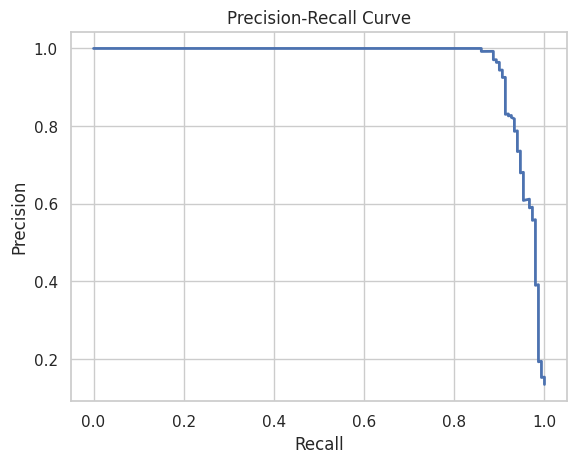

In [51]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob, pos_label='spam')

plt.figure()
plt.plot(recall, precision, lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy: 97.847533632287 %


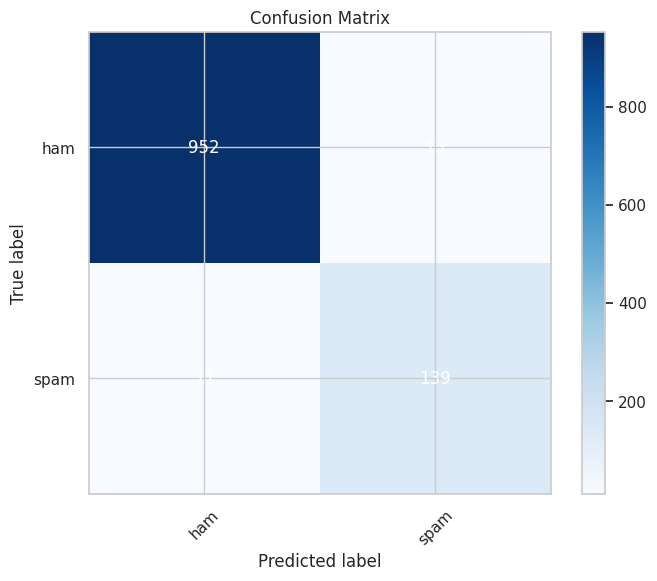

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
df = pd.read_csv('spam.csv', encoding='latin1')
X = df['v2']
y = df['v1']
X = X.str.lower()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy*100,"%")
cm = confusion_matrix(y_test, y_pred)
labels = ['ham', 'spam']

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white')
plt.show()



In [53]:
y_true = y_test
y_pred_prob = clf.predict_proba(X_test)[:, 1]

In [54]:
df['v1'] = df['v1'].apply(lambda x: 1 if x == 'spam' else 0)


In [55]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob, pos_label='spam')
roc_auc = auc(fpr, tpr)


In [56]:
roc_auc

0.9792158894645941

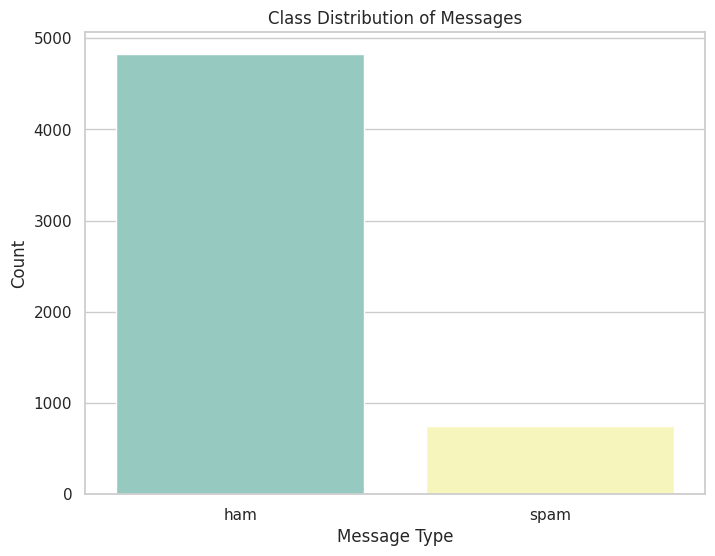

In [57]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='v1', palette="Set3")
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Class Distribution of Messages')
plt.show()



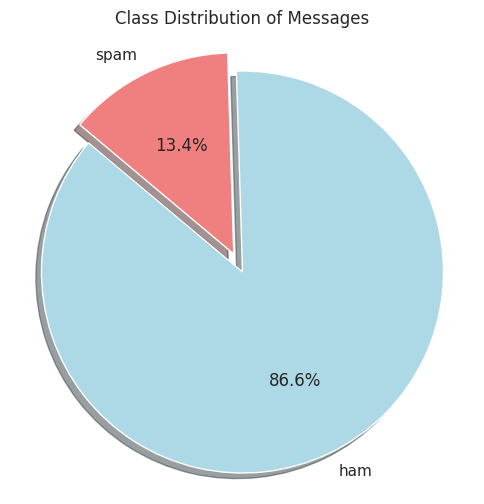

In [63]:
ham_count = df[df['v1'] == 'ham']['v1'].count()
spam_count = df[df['v1'] == 'spam']['v1'].count()
labels = ['ham', 'spam']
sizes = [ham_count, spam_count]
colors = ['lightblue', 'lightcoral']
explode = (0, 0.1)
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Class Distribution of Messages')
plt.show()

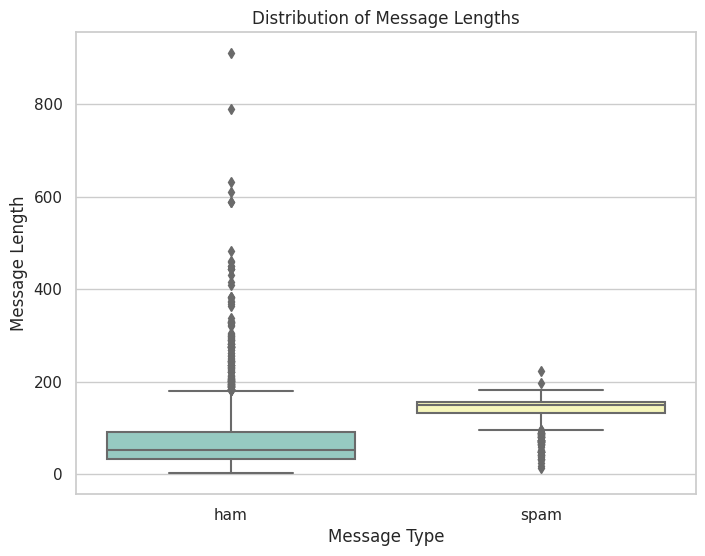

In [59]:
df['v2'] = df['v2'].str.lower()
df['message_length'] = df['v2'].apply(len)
plt.figure(figsize=(8, 6))
sns.boxplot(x='v1', y='message_length', data=df, palette="Set3")
plt.xlabel('Message Type')
plt.ylabel('Message Length')
plt.title('Distribution of Message Lengths')
plt.show()

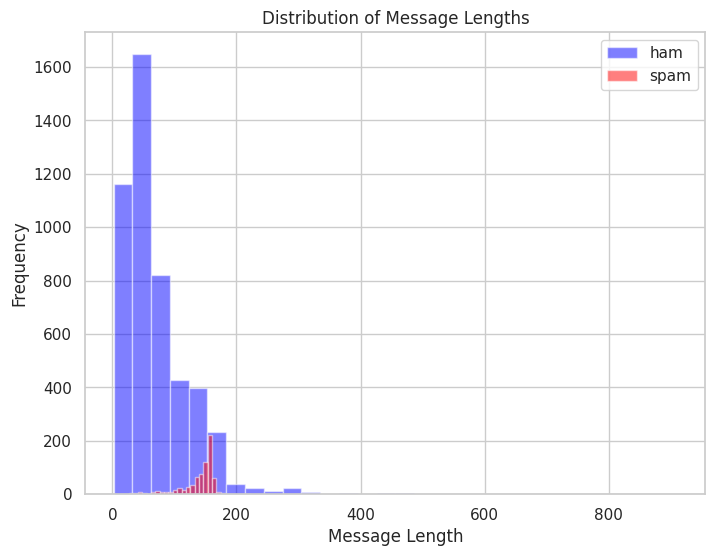

In [60]:
df['v2'] = df['v2'].str.lower()
df['message_length'] = df['v2'].apply(len)
plt.figure(figsize=(8, 6))
plt.hist(df[df['v1'] == 'ham']['message_length'], bins=30, alpha=0.5, label='ham', color='blue')
plt.hist(df[df['v1'] == 'spam']['message_length'], bins=30, alpha=0.5, label='spam', color='red')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Message Lengths')
plt.show()